<h2><strong>Predictive Modeling of Health Insurance Charges: Understanding the factors influencing costs</strong></h2>

<img style="width: 1000px; height: 500px; border: 1px solid #ccc;" src="images/IMG_0597.JPG"></image>

Lets start by load this data into a Pandas DataFrame. This will enable us to explore the data through filtering, selecting new colums and creating new columns.


First, let's take a look at the available columns:
   - `age` Age of primary beneficiary.
   - `sex` Insurance contractor gender, female / male.
   - `bmi` Body mass index, providing an understanding of body of principal beneficiary.
   - `childeren` Number of children covered by health insurance / Number of dependents
   - `smoker` smoker / non - smoker.
   - `region` stores the beneficiary's residential area in the US, northeast, southeast, southwest, northwest..
   - `charges` stores the estimated medical insurance costs for the individuals.
   

In [27]:
#Import....
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('insurance[1].csv')

In [5]:
#Glimpse of the data
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Last five rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
#Check for unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
# Checking for duplicate values
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [10]:
# Droping duplicate values
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1337, 7)

<h5> Data Cleaning</h5>

In [28]:
df.isnull().any()

age             False
sex             False
bmi             False
children        False
smoker          False
region          False
charges         False
bmi_category    False
dtype: bool

<h3>Summary and Distribution of Numerical Variables</h3>
Lets start by creating a function statistically summarize the numerical variable.This function will also spin up a few plots to visually describe the variable

In [104]:
# Helper Functions

def summary(x):
    x_min = min(df[x])
    x_max = max(df[x])

    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.50)
    q3 = df[x].quantile(0.75)

    print(f"Variable is {x}")
    print(f"Min value: {x_min}")
    print(f"Max value: {x_max}")
    print(f"Q1 -> {q1} Q2 -> {q2} Q3 -> {q3}")



    # Define figure object
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.subplots_adjust(hspace=0.6)
    sns.set_palette('pastel')

    # Density Distribution Plot
    sns.histplot(x=df[x], color='r', ax=axes[0, 0])
    axes[0, 0].set_title(f"{x.capitalize()} Density Distribution")

    # Violin Plot
    sns.violinplot(y=x, data=df, split=True, ax=axes[0, 1], legend=False)
    axes[0, 1].set_title(f"{x.capitalize()} Violin Plot")

    # Boxplot
    sns.boxplot(x=x, data=df, width=0.7, linewidth=0.6, ax=axes[1, 0], legend=False)
    axes[1, 0].set_title(f"{x.capitalize()} Boxplot")

    #Cummulative Density plot
    sns.kdeplot(data=df[x], cumulative=True, ax=axes[1, 1])
    axes[1, 1].set_title('Cumulative Density Distribution of Age')

    plt.show()




def box_plot(x='bmi'):
    fig, axes = plt.subplots(1, figsize=(6, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')
    bp_dict = df.boxplot(column=x,
                         grid=True,
                         figsize=(6, 8),
                         ax=axes,
                         vert=True,
                         notch=False,
                         widths=0.7,
                         showmeans=True,
                         whis=1.5,
                         flierprops=red_diamond,
                         boxprops=dict(linewidth=3.0, color='black'),
                         return_type='dict'
                         )

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()

    skew = df[x].skew()
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1

    total_outlier_num = ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum()

    print(f"Mean {x.capitalize()} = {df[x].mean()}")
    print(f"Median {x.capitalize()} = {df[x].median()}")
    print(f"Skewness of {x}: {skew}.")
    print(f"Total number of outliers in {x} distribution: {total_outlier_num}")


Variable is bmi
Min value: 15.96
Max value: 53.13
Q1 -> 26.29 Q2 -> 30.4 Q3 -> 34.7


RuntimeError: Cumulative KDE evaluation requires scipy

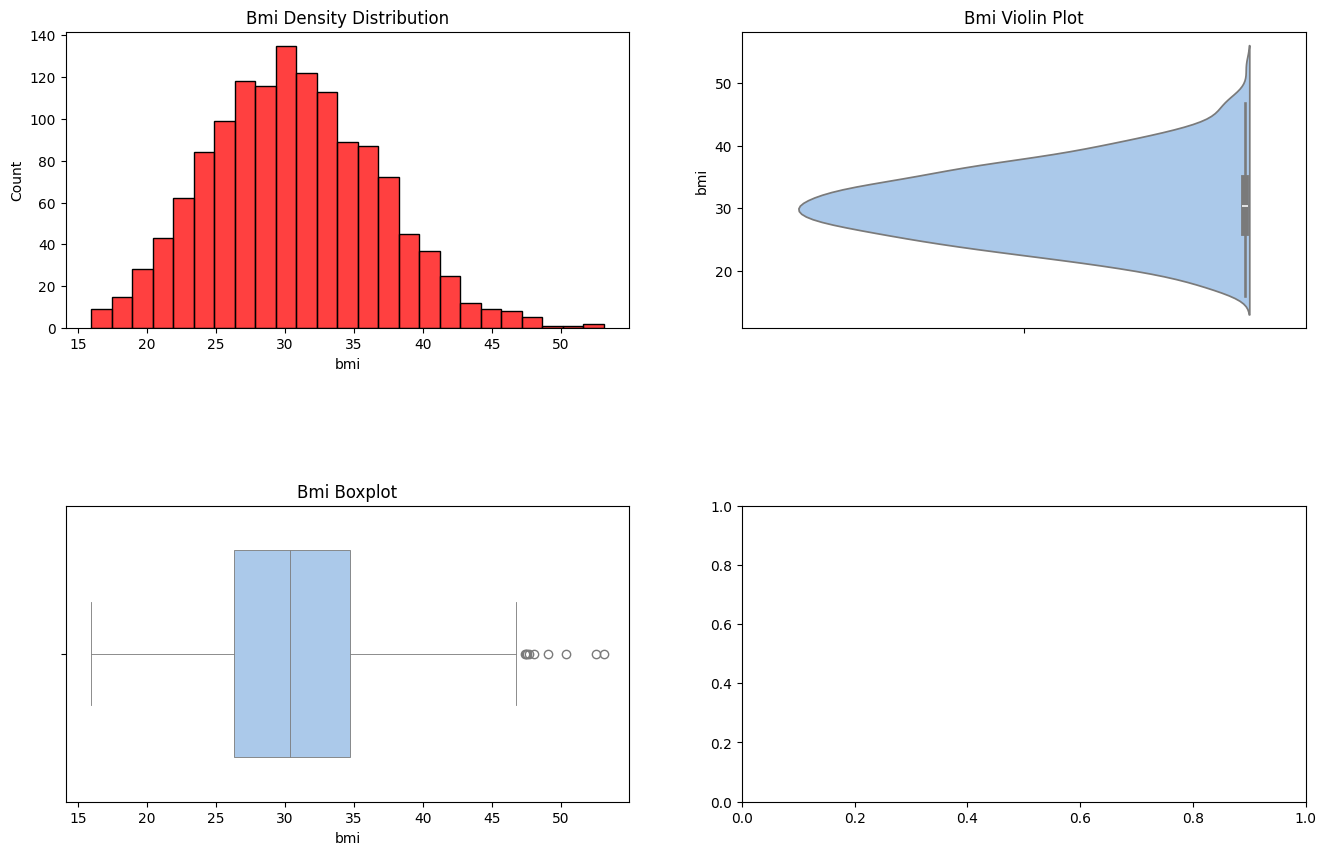

In [105]:
summary('bmi')

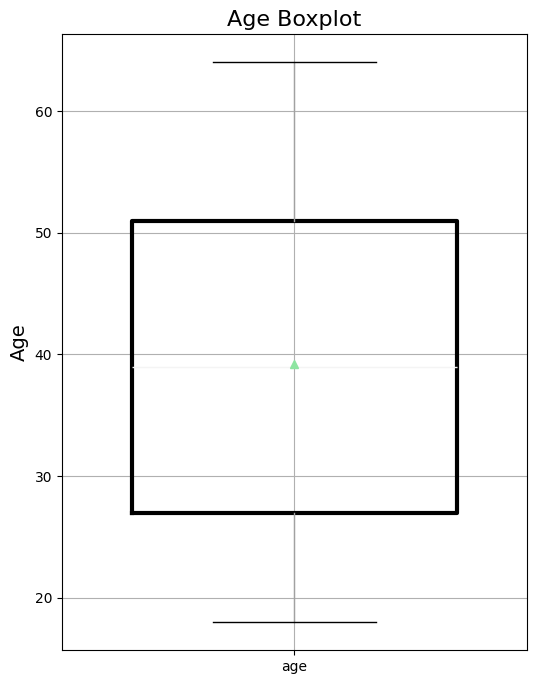

Mean Age = 39.222139117427076
Median Age = 39.0
Skewness of age: 0.054780773126998195.
Total number of outliers in age distribution: 0


In [99]:
box_plot('age')

In [12]:
#Checking data types and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
#row*cols
df.size

9359

Let us now create a new column to categorize the beneficiaries. We would filter out smokers from non smokers and categorize the weight by their respective BMI. 

In [15]:
# Selecting specific columns
selected_data = df[['age', 'sex', 'charges']]

# Filtering df based on certain conditions
smokers = df[df['smoker'] == 'yes']

# Creating a new column for BMI category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

df


,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [22]:
#Average charges for smokers and non smokers 
avg_charges_smokers = df[df['smoker'] == 'yes']['charges'].mean()
avg_charges_non_smokers = df[df['smoker'] == 'no']['charges'].mean()

print(f" Non smokers are charged approx. {round(avg_charges_non_smokers)} on average while smokers are charged approx. {round(avg_charges_smokers)} on average!")

 Non smokers are charged approx. 8441 on average while smokers are charged approx. 32050 on average!


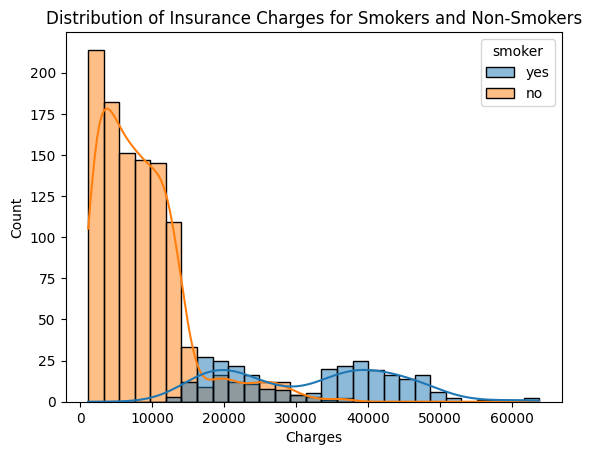

In [25]:
# Distribution of charges for smokers and non-smokers
sns.histplot(data=df, x='charges', hue='smoker', kde=True)
plt.xlabel('Charges')
plt.title('Distribution of Insurance Charges for Smokers and Non-Smokers')
plt.show()

In [ ]:
X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Who is the insured with the highest BMI, and how does his charges compare to the rest?